In [31]:
from sklearn.metrics import roc_curve, average_precision_score, \
    precision_recall_curve, roc_auc_score, auc
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

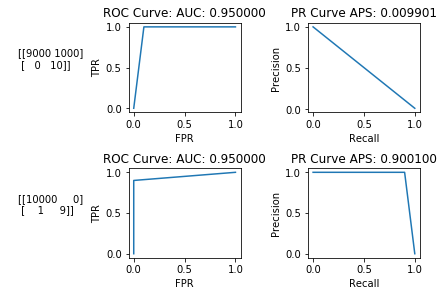

In [45]:
cm1 = np.array([
    [9000, 1000],
    [0, 10]
])
cm2 = np.array([
    [10000, 0],
    [1, 9]
])

cms = [cm1, cm2]


# print(np.zeros(np.sum(cm1[0, :])).shape)
# print(np.ones(np.sum(cm1[1, :])).shape)

fig = plt.figure(constrained_layout=True)
gs = fig.add_gridspec(len(cms), 3
                      #, height_ratios=heights,
                      ,width_ratios=[1, 5, 5]
                     )

for i, cm in enumerate(cms):
    y_true = np.append(np.zeros(np.sum(cm[0, :])), np.ones(np.sum(cm[1, :])))
    y_pred = np.append(np.zeros(np.sum(cm[:, 0])), np.ones(np.sum(cm[:, 1])))
    
    ax = fig.add_subplot(gs[i, 0])
    ax.text(0.5, 0.5, str(cm))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)
    
    ax = fig.add_subplot(gs[i, 1])
    fpr, tpr, thresholds = roc_curve(y_true, y_pred)
    ax.plot(fpr, tpr)
    ax.set_xlabel('FPR')
    ax.set_ylabel('TPR')
    ax.set_title('ROC Curve: AUC: %f' % roc_auc_score(y_true, y_pred))

    ax = fig.add_subplot(gs[i, 2])
    p, r, th = precision_recall_curve(y_true, y_pred)
    ax.plot(r, p)
    ax.set_xlabel('Recall')
    ax.set_ylabel('Precision')
    ax.set_title('PR Curve APS: %f' % average_precision_score(y_true, y_pred))
plt.show()


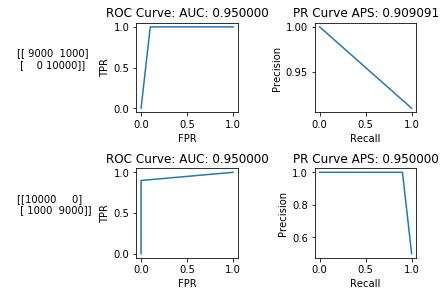

In [46]:
cm1 = np.array([
    [9000, 1000],
    [0, 10000]
])
cm2 = np.array([
    [10000, 0],
    [1000, 9000]
])

cms = [cm1, cm2]


# print(np.zeros(np.sum(cm1[0, :])).shape)
# print(np.ones(np.sum(cm1[1, :])).shape)

fig = plt.figure(constrained_layout=True)
gs = fig.add_gridspec(len(cms), 3
                      #, height_ratios=heights,
                      ,width_ratios=[1, 5, 5]
                     )

for i, cm in enumerate(cms):
    y_true = np.append(np.zeros(np.sum(cm[0, :])), np.ones(np.sum(cm[1, :])))
    y_pred = np.append(np.zeros(np.sum(cm[:, 0])), np.ones(np.sum(cm[:, 1])))
    
    ax = fig.add_subplot(gs[i, 0])
    ax.text(0.5, 0.5, str(cm))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)
    
    ax = fig.add_subplot(gs[i, 1])
    fpr, tpr, thresholds = roc_curve(y_true, y_pred)
    ax.plot(fpr, tpr)
    ax.set_xlabel('FPR')
    ax.set_ylabel('TPR')
    ax.set_title('ROC Curve: AUC: %f' % roc_auc_score(y_true, y_pred))

    ax = fig.add_subplot(gs[i, 2])
    p, r, th = precision_recall_curve(y_true, y_pred)
    ax.plot(r, p)
    ax.set_xlabel('Recall')
    ax.set_ylabel('Precision')
    ax.set_title('PR Curve APS: %f' % average_precision_score(y_true, y_pred))
plt.show()


In [ ]:
# HARMONIC MEAN VS MEAN


%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np

# Make data.
P = np.arange(1e-15, 1, 0.01)
R = np.arange(1e-15, 1, 0.01)
P, R = np.meshgrid(P, R)


fig = plt.figure()
ax = fig.gca(projection='3d')
Z = (P + R) / 2.0
# Plot the surface.
surf = ax.plot_surface(P, R, Z, cmap=cm.coolwarm,
                           linewidth=0, antialiased=False)
# Customize the z axis.
ax.set_zlim(0, 1)
# Add a color bar which maps values to colors.
# fig.colorbar(surf, shrink=0.5, aspect=5)
plt.title('Arithmetic Mean')
plt.show()



fig = plt.figure()
ax = fig.gca(projection='3d')
Z = np.sqrt(P*R)
# Plot the surface.
surf = ax.plot_surface(P, R, Z, cmap=cm.coolwarm,
                           linewidth=0, antialiased=False)
# Customize the z axis.
ax.set_zlim(0, 1)
# Add a color bar which maps values to colors.
# fig.colorbar(surf, shrink=0.5, aspect=5)
plt.title('Geometric Mean')
plt.show()



fig = plt.figure()
ax = fig.gca(projection='3d')
Z = 2* P*R / (P+R)
# Plot the surface.
surf = ax.plot_surface(P, R, Z, cmap=cm.coolwarm,
                           linewidth=0, antialiased=False)
# Customize the z axis.
ax.set_zlim(0, 1)
# Add a color bar which maps values to colors.
# fig.colorbar(surf, shrink=0.5, aspect=5)
plt.title('Harmonic Mean (F1 Score)')
plt.show()


fig = plt.figure()
ax = fig.gca()

P = np.arange(1e-15, 1, 0.01)
R = np.ones(len(P))  #np.arange(1e-15, 1, 0.01)
labels = ['A.Mean', 'G.Mean', 'H.Mean']
data = [
    (P+R)/2,
    np.sqrt(P*R),
    2* P*R / (P+R)
]
# Plot the surface.
ax.plot(P, data[0], linewidth=1, label=labels[0])
ax.plot(P, data[1], linewidth=1, label=labels[1])
ax.plot(P, data[2], linewidth=1, label=labels[2])
ax.legend()
# Customize the z axis.
# ax.set_zlim(0, 1)
# Add a color bar which maps values to colors.
# fig.colorbar(surf, shrink=0.5, aspect=5)
plt.title('Mean for equal P, R IS THE SAME. Here mean for R=1 and varying P')
plt.show()


